<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/12week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

pd.DataFrame(X, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X)
pd.DataFrame(X_reduced, columns = ["1_?", "2_?", "3_?"])

,1_?,2_?,3_?
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [3]:
X_95 = PCA(n_components = 0.95).fit_transform(X)

In [4]:
X_95

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X)
X4D = pca.inverse_transform(X_reduced)
pd.DataFrame(X4D, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.099286,3.500723,1.401086,0.198295
1,4.868758,3.031661,1.447517,0.125368
2,4.693700,3.206384,1.309582,0.184951
3,4.623843,3.075837,1.463736,0.256958
4,5.019326,3.580414,1.370606,0.246168
...,...,...,...,...
145,6.565541,3.136265,5.404505,1.978794
146,6.219750,2.581327,5.122055,1.708294
147,6.456778,3.043802,5.265739,1.896748
148,6.185931,3.414258,5.421399,2.266390


In [6]:
# 주성분
print("주성분 : \n", pca.components_)

# 표현 분산
print("표현분산 : \n", pca.explained_variance_ratio_)

주성분 : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
표현분산 : 
 [0.92461872 0.05306648 0.01710261]


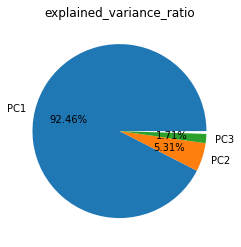

In [7]:
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, index = ['PC1', 'PC2', 'PC3'], columns = ['V_ratio'])
plt.pie(df_v['V_ratio'], labels = df_v.index, autopct = '%.2f%%')
plt.title('explained_variance_ratio')
plt.show()

In [8]:
df_v

,V_ratio
PC1,0.924619
PC2,0.053066
PC3,0.017103


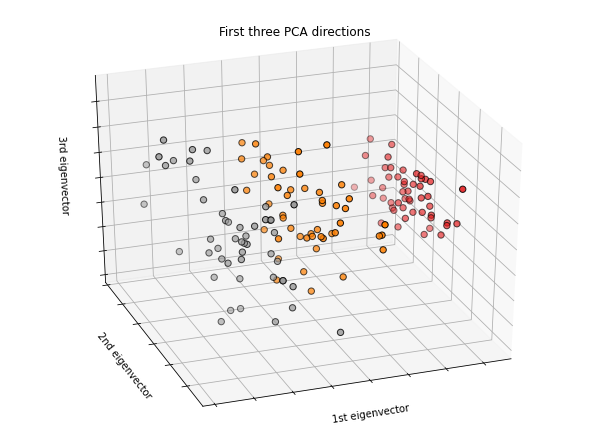

In [9]:
# 줄어든 차원으로 iris 데이터 시각화 하기
fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, elev = -150, azim = 110)
X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap = plt.cm.Set1,
    edgecolor = 'k',
    s = 40
)
ax.set_title("First three PCA directions")
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [10]:
#  랜덤 PCA
rnd_pca = PCA(n_components = 3, svd_solver = 'randomized', random_state = 42)
X_reduced_rnd = rnd_pca.fit_transform(X)
X_reduced_rnd

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [11]:
# 점진적 PCA
from sklearn.decomposition import IncrementalPCA
import numpy as np
n_batches = 10
inc_pca = IncrementalPCA(n_components = 3)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(X)

In [12]:
X_reduced_inc

array([[-2.68412075e+00,  3.19410679e-01, -2.83185072e-02],
       [-2.71414633e+00, -1.77030861e-01, -2.15843428e-01],
       [-2.88899594e+00, -1.44888267e-01,  1.66775353e-02],
       [-2.74533762e+00, -3.18307958e-01,  3.59456596e-02],
       [-2.72870898e+00,  3.26795891e-01,  9.31402092e-02],
       [-2.28085666e+00,  7.41449389e-01,  1.69229497e-01],
       [-2.82054573e+00, -8.92954996e-02,  2.60170682e-01],
       [-2.62613558e+00,  1.63363159e-01, -1.94468517e-02],
       [-2.88638673e+00, -5.78286486e-01,  2.24995640e-02],
       [-2.67273872e+00, -1.13922197e-01, -1.94101391e-01],
       [-2.50693354e+00,  6.45034277e-01, -7.48393630e-02],
       [-2.61273863e+00,  1.47008509e-02,  1.10883520e-01],
       [-2.78609985e+00, -2.35225376e-01, -2.06022674e-01],
       [-3.22380982e+00, -5.11334209e-01,  6.26226773e-02],
       [-2.64475096e+00,  1.17882191e+00, -1.61421281e-01],
       [-2.38603928e+00,  1.33828034e+00,  2.75994530e-01],
       [-2.62354927e+00,  8.10938071e-01

## 커널 PCA

In [13]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel = 'linear', fit_inverse_transform = True)
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
sig_pca = KernelPCA(n_components = 2, kernel = 'sigmoid', gamma = 0.001, coef0 = 1, fit_inverse_transform = True)

X_reduced_lin = lin_pca.fit_transform(X)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_sig = sig_pca.fit_transform(X)

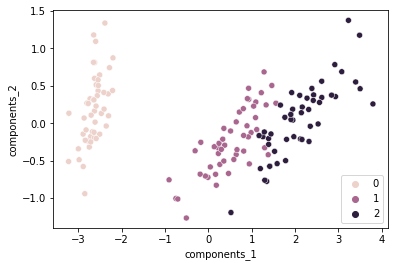

In [14]:
import seaborn as sns
sns.scatterplot(x = X_reduced_lin[:, 0], y = X_reduced_lin[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

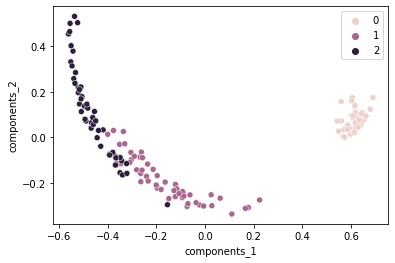

In [15]:
sns.scatterplot(x = X_reduced_rbf[:, 0], y = X_reduced_rbf[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

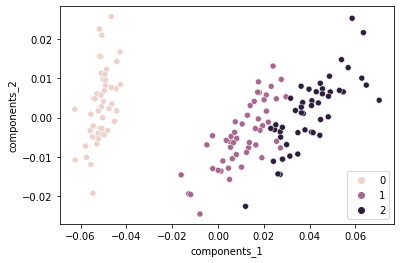

In [16]:
sns.scatterplot(x = X_reduced_sig[:, 0], y = X_reduced_sig[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

## PCA 평가 방법

In [17]:
# 지도학습 모델과 함께 사용
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
                ('kpca', KernelPCA(n_components = 2)),
                ('log_reg', LogisticRegression(solver = 'lbfgs'))
])

param_grid = [{
    'kpca__gamma' : np.linspace(0.03, 0.05, 10),
    'kpca__kernel' : ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [18]:
# 재구성 오차
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

0.158830063017041

## 차원 수 선택

In [19]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

# LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X, y)
X_reduced_lda = lda.transform(X
)

In [21]:
X_reduced_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

# QDA

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [23]:
N = 100
rv1 = stats.multivariate_normal([0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = stats.multivariate_normal([1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])

np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])



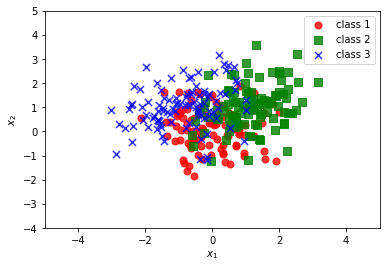

In [24]:
# 산점도 그리기
plt.scatter(X1[:, 0], X1[:, 1], alpha = 0.8, s = 50, marker = 'o', color = 'r', label = 'class 1')
plt.scatter(X2[:, 0], X2[:, 1], alpha = 0.8, s = 50, marker = 's', color = 'g', label = 'class 2')
plt.scatter(X3[:, 0], X3[:, 1], alpha = 0.8, s = 50, marker = 'x', color = 'b', label = 'class 3')
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [25]:
# QDA 적합
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance = True).fit(X, y)

In [26]:
# 적합 결과

# 각 클래스 k의 사전확률
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [27]:
# 각 클래스 k에서 x의 기댓값 벡터 mk의 추정치 벡터
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [28]:
# 각 클래스 k에서 x의 공분산 행렬의 추정치 행렬 (생성자 인수 store_covariance 값이 True일 경우에만 제공)
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [29]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [30]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

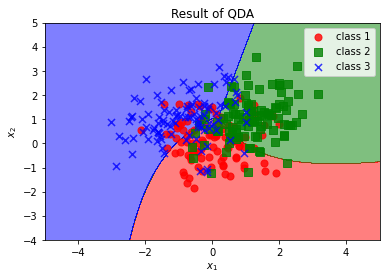

In [31]:
# QDA decision boundary 시각화
import matplotlib as mpl
import seaborn as sns

x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min) / 1000),
                       np.arange(x2min, x2max, (x2max-x2min) / 1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r', 'g', 'b']).as_hex())
plt.contourf(XX1, XX2, YY, cmap = cmap, alpha = 0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha = 0.8, s = 50, marker = 'o', color = 'r', label = 'class 1')
plt.scatter(X2[:, 0], X2[:, 1], alpha = 0.8, s = 50, marker = 's', color = 'g', label = 'class 2')
plt.scatter(X3[:, 0], X3[:, 1], alpha = 0.8, s = 50, marker = 'x', color = 'b', label = 'class 3')
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Result of QDA")
plt.legend()
plt.show()

# 실습

In [32]:
!pip install pydataset

     |████████████████████████████████| 15.9 MB 407 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=0672481f29b60f1f687f4a88b5c1d8519d7c69e4138a5d1712d35c1ccc386ec5
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [33]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

In [34]:
df = data('Wages1')
df.head()

,exper,sex,school,wage
1,9,female,13,6.315296
2,12,female,12,5.479770
3,11,female,11,3.642170
4,9,female,14,4.593337
5,8,female,14,2.418157


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 1 to 3294
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exper   3294 non-null   int64  
 1   sex     3294 non-null   object 
 2   school  3294 non-null   int64  
 3   wage    3294 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 128.7+ KB


In [36]:
df.describe()

,exper,school,wage
count,3294.000000,3294.000000,3294.000000
mean,8.043412,11.630540,5.757585
std,2.290661,1.657545,3.269186
min,1.000000,3.000000,0.076556
25%,7.000000,11.000000,3.621570
50%,8.000000,12.000000,5.205781
75%,9.000000,12.000000,7.304506
max,18.000000,16.000000,39.808917


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


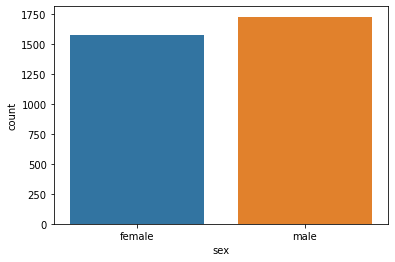

In [37]:
# 범주형 변수
sns.countplot(df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

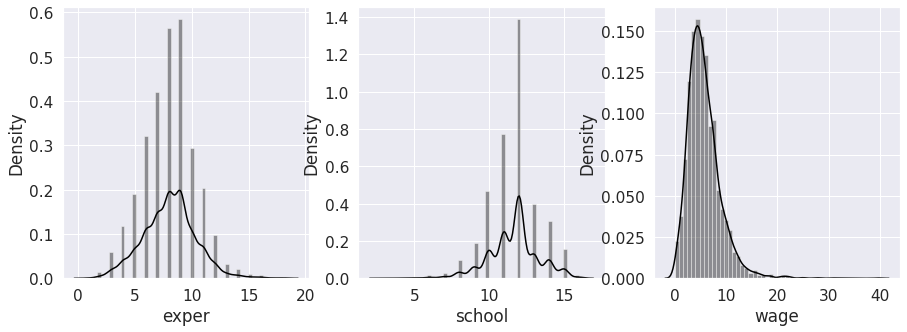

In [39]:
# 수치형 변수
fig = plt.figure()
fig, axs = plt.subplots(figsize = (15, 5), ncols = 3)
sns.set(font_scale = 1.4)
sns.distplot(df['exper'], color = 'black', ax = axs[0])
sns.distplot(df['school'], color = 'black', ax = axs[1])
sns.distplot(df['wage'], color = 'black', ax = axs[2])

In [40]:
# 범주형 변수 --> 더미 변수 변환
sex = pd.get_dummies(df['sex'])
df.drop(['sex'], axis = 1, inplace = True)
df = pd.concat([df, sex], axis = 1)
df.head()

,exper,school,wage,female,male
1,9,13,6.315296,1,0
2,12,12,5.479770,1,0
3,11,11,3.642170,1,0
4,9,14,4.593337,1,0
5,8,14,2.418157,1,0


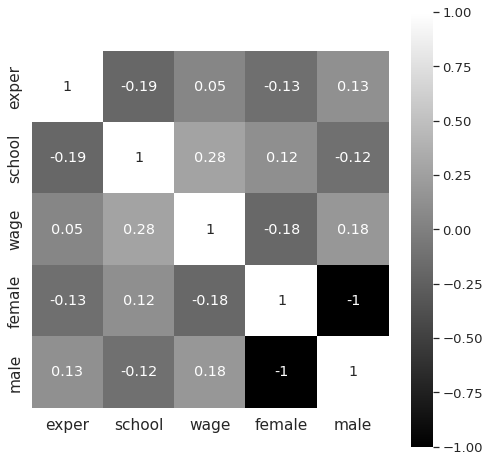

In [41]:
corrmat = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (8, 8))
sns.set(font_scale = 1.2)
sns.heatmap(round(corrmat, 2),
            vmax = 1., square = True,
            cmap = 'gist_gray', annot = True)

## 데이터 나누기

In [42]:
X = df[['exper', 'school', 'wage']]
y = df['male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 50)

## LDA 적합

In [43]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

## LDA 평가

Text(0.5, 18.5, 'Predict')

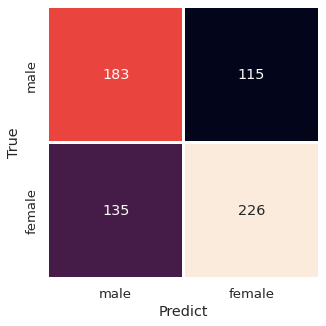

In [44]:
cm = confusion_matrix(y_test, y_pred_lda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g', linewidths = 2.5,
                xticklabels = {'female', 'male'}, yticklabels = {'female', 'male'})
plt.ylabel('True'); plt.xlabel('Predict')

In [45]:
round(accuracy_score(y_test, y_pred_lda), 4)

0.6206

In [47]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       298
           1       0.66      0.63      0.64       361

    accuracy                           0.62       659
   macro avg       0.62      0.62      0.62       659
weighted avg       0.62      0.62      0.62       659



## QDA 적합

In [49]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

## QDA 평가

Text(0.5, 18.5, 'Predict')

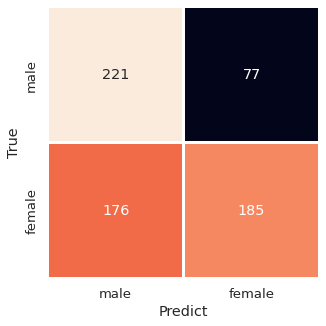

In [50]:
cm = confusion_matrix(y_test, y_pred_qda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g', linewidths = 2.5,
                xticklabels = {'female', 'male'}, yticklabels = {'female', 'male'})
plt.ylabel('True'); plt.xlabel('Predict')

In [52]:
round(accuracy_score(y_test, y_pred_qda), 4)

0.6161

In [54]:
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       298
           1       0.71      0.51      0.59       361

    accuracy                           0.62       659
   macro avg       0.63      0.63      0.61       659
weighted avg       0.64      0.62      0.61       659



## ROC & AUC

Text(0.5, 0, 'False Positive Rate')

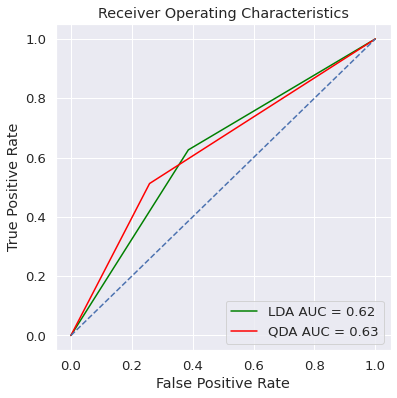

In [56]:
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(y_test, y_pred_qda)
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)
false_positive_rate_lda, true_positive_rate_lda, thresholds = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(false_positive_rate_lda, true_positive_rate_lda)

plt.figure(figsize = (6, 6))
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate_lda, true_positive_rate_lda,
         color = 'green', label = 'LDA AUC = {:.2f}'.format(roc_auc_lda))
plt.plot(false_positive_rate_qda, true_positive_rate_qda,
         color = 'red', label = 'QDA AUC = {:.2f}'.format(roc_auc_qda))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')